In [15]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

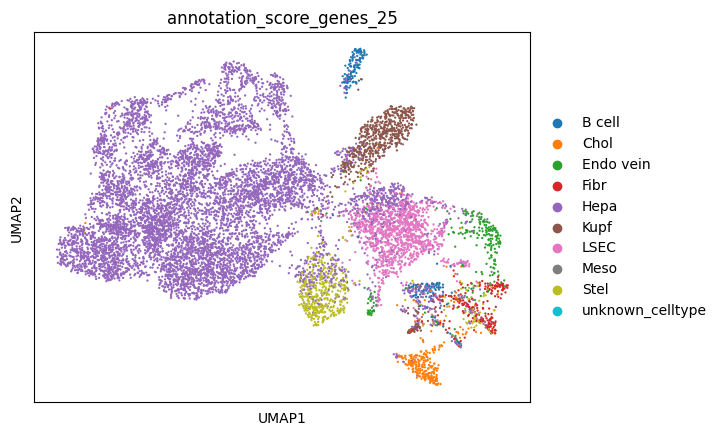

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Do score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

0.25


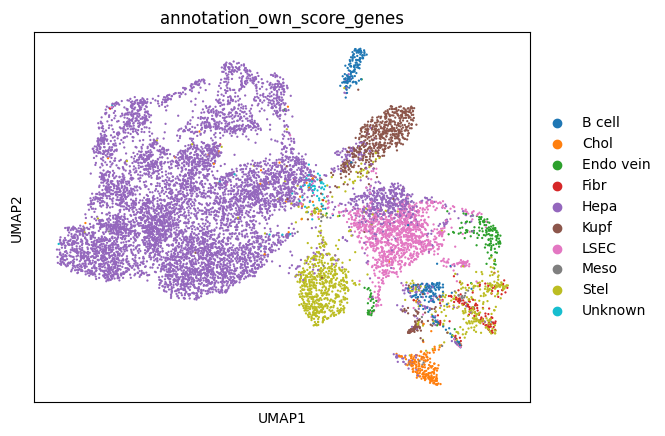

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.511578
Chol                         2.092982
Endo vein                    1.522978
Fibr                         1.077663
Hepa                        67.011044
Kupf                         5.976131
LSEC                        10.473815
Meso                         0.338440
Stel                         8.469897
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.536893,NaN,0.018476,0.068247,0.020264,NaN,0.015266,NaN,NaN
1,NaN,0.045767,NaN,NaN,0.361570,NaN,0.242203,NaN,0.392005
2,NaN,NaN,NaN,NaN,0.020269,NaN,0.358542,NaN,0.685175
3,0.197457,NaN,NaN,0.028096,NaN,NaN,0.178748,NaN,0.237066
4,0.232147,NaN,NaN,0.053522,NaN,0.055269,0.016683,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.309270,NaN,NaN,0.045819,NaN,0.060015,0.015148,NaN,NaN
11224,0.506973,NaN,NaN,0.062634,0.048775,0.070629,0.021619,NaN,NaN
11225,0.350109,NaN,NaN,0.045267,0.049173,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.059453,0.587182,0.184023,NaN,NaN


In [5]:
# With norm_expr_var = True and scale_score = MinMax
scores = own_score_genes(sdata,path_mg,scale_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


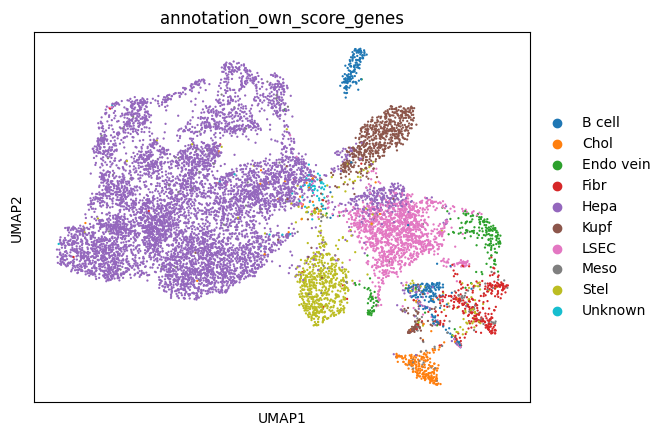

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.769861
Chol                         2.217670
Endo vein                    1.897043
Fibr                         2.850018
Hepa                        63.795867
Kupf                         6.172070
LSEC                        12.157107
Meso                         1.398290
Stel                         6.216601
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.743032,NaN,0.046567,0.171944,0.039049,NaN,0.044761,NaN,NaN
1,NaN,0.096056,NaN,NaN,0.696752,NaN,0.710145,NaN,2.142568
2,NaN,NaN,NaN,NaN,0.039060,NaN,1.051252,NaN,3.744933
3,0.273270,NaN,NaN,0.070785,NaN,NaN,0.524092,NaN,1.295720
4,0.321279,NaN,NaN,0.134845,NaN,0.084267,0.048914,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.428013,NaN,NaN,0.115439,NaN,0.091503,0.044415,NaN,NaN
11224,0.701624,NaN,NaN,0.157802,0.093991,0.107685,0.063386,NaN,NaN
11225,0.484533,NaN,NaN,0.114047,0.094757,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.114567,0.895259,0.539560,NaN,NaN


In [6]:
# With norm_expr_var = True and scale_score = robust (q = 1)
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


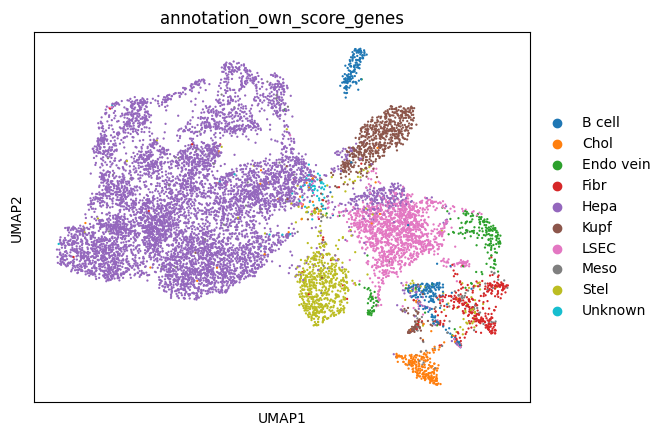

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.858924
Chol                         2.333452
Endo vein                    1.941575
Fibr                         3.001425
Hepa                        63.617741
Kupf                         6.056288
LSEC                        12.433203
Meso                         1.157820
Stel                         6.083007
Unknown                      0.516566


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.742125,NaN,0.047707,0.188044,0.040411,NaN,0.051352,NaN,NaN
1,NaN,0.102589,NaN,NaN,0.698543,NaN,0.610657,NaN,1.841340
2,NaN,NaN,NaN,NaN,0.035988,NaN,0.693324,NaN,2.510725
3,0.275121,NaN,NaN,0.079932,NaN,NaN,0.389737,NaN,0.802976
4,0.323314,NaN,NaN,0.151606,NaN,0.087185,0.056116,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.431841,NaN,NaN,0.129876,NaN,0.094561,0.050954,NaN,NaN
11224,0.704748,NaN,NaN,0.177629,0.095943,0.111424,0.072719,NaN,NaN
11225,0.487704,NaN,NaN,0.127613,0.092615,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.117031,0.923753,0.613592,NaN,NaN


In [7]:
# With norm_expr_var = False and scale_score = robust (q = 1)
scores = own_score_genes(sdata,path_mg,norm_expr_var=False)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

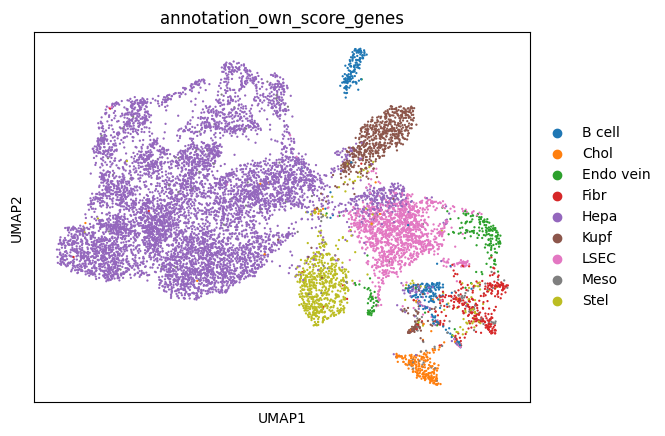

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.743142
Chol                         2.075169
Endo vein                    1.879230
Fibr                         2.805486
Hepa                        65.140720
Kupf                         6.065194
LSEC                        11.943356
Meso                         1.398290
Stel                         5.949412


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.743032,0.000000,0.046567,0.171944,0.039049,0.049207,0.044761,0.0,0.000000
1,0.182935,0.096056,0.000000,0.000000,0.696752,0.015112,0.710145,0.0,2.142568
2,0.178123,0.000000,0.000000,0.031008,0.039060,0.037701,1.051252,0.0,3.744933
3,0.273270,0.000000,0.000000,0.070785,0.000000,0.039191,0.524092,0.0,1.295720
4,0.321279,0.000000,0.000000,0.134845,0.000000,0.084267,0.048914,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.428013,0.000000,0.000000,0.115439,0.000000,0.091503,0.044415,0.0,0.000000
11224,0.701624,0.000000,0.000000,0.157802,0.093991,0.107685,0.063386,0.0,0.000000
11225,0.484533,0.000000,0.000000,0.114047,0.094757,0.026294,0.023918,0.0,0.000000
11226,0.047536,0.000000,0.000000,0.020725,0.114567,0.895259,0.539560,0.0,0.000000


In [16]:
# With norm_expr_var = True, scale_score = robust (q = 1) and min_score = 'None'
scores = own_score_genes(sdata,path_mg,min_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


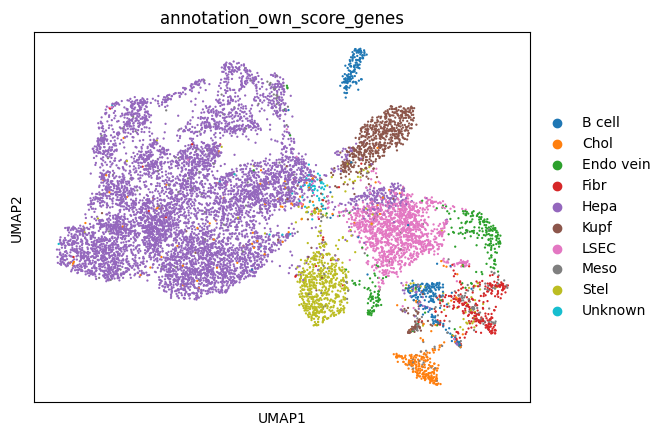

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.108301
Chol                         2.885643
Endo vein                    2.449234
Fibr                         2.573922
Hepa                        62.157107
Kupf                         6.163164
LSEC                        11.934450
Meso                         2.333452
Stel                         5.869255
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.793734,NaN,0.072819,0.278487,0.047250,NaN,0.057232,NaN,NaN
1,NaN,0.113147,NaN,NaN,0.843083,NaN,0.907998,NaN,4.224080
2,NaN,NaN,NaN,NaN,0.047263,NaN,1.344140,NaN,7.383148
3,0.286439,NaN,NaN,0.114647,NaN,NaN,0.670108,NaN,2.554517
4,0.338284,NaN,NaN,0.218401,NaN,0.090737,0.062542,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.453546,NaN,NaN,0.186970,NaN,0.099232,0.056789,NaN,NaN
11224,0.749018,NaN,NaN,0.255582,0.113731,0.118232,0.081046,NaN,NaN
11225,0.514581,NaN,NaN,0.184715,0.114658,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.138629,1.042926,0.689886,NaN,NaN


In [9]:
# With norm_expr_var = True and scale_score = robust (q = 2)
scores = own_score_genes(sdata,path_mg,scale_score_q=2)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


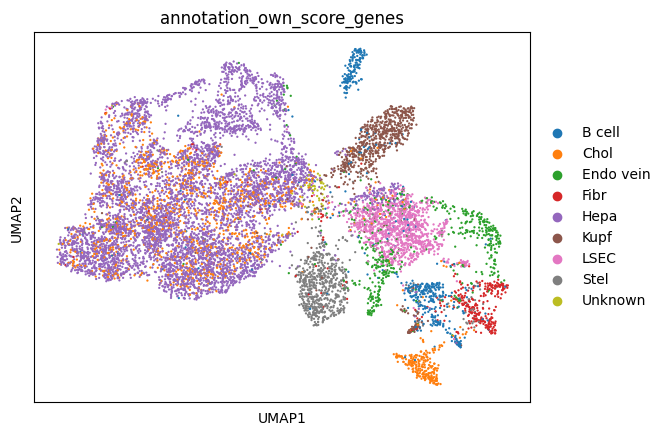

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.871749
Chol                        12.949768
Endo vein                    4.782686
Fibr                         2.912362
Hepa                        51.184539
Kupf                         6.501603
LSEC                        10.340221
Stel                         5.931600
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.867039,NaN,0.162073,0.499375,0.082025,NaN,0.072782,NaN,NaN
1,NaN,0.149496,NaN,NaN,1.463589,NaN,1.352147,NaN,0.392005
2,NaN,NaN,NaN,NaN,0.082048,NaN,2.008009,NaN,0.685175
3,0.288686,NaN,NaN,0.205581,NaN,NaN,0.994413,NaN,0.237066
4,0.347793,NaN,NaN,0.391631,NaN,0.116206,0.080767,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.479200,NaN,NaN,0.335269,NaN,0.129461,0.072116,NaN,NaN
11224,0.816059,NaN,NaN,0.458302,0.197436,0.159106,0.108593,NaN,NaN
11225,0.548785,NaN,NaN,0.331226,0.199045,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.240659,1.601909,1.024154,NaN,NaN


In [10]:
# With norm_expr_var = True and scale_score = robust (q = 5)
scores = own_score_genes(sdata,path_mg,scale_score_q=5)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


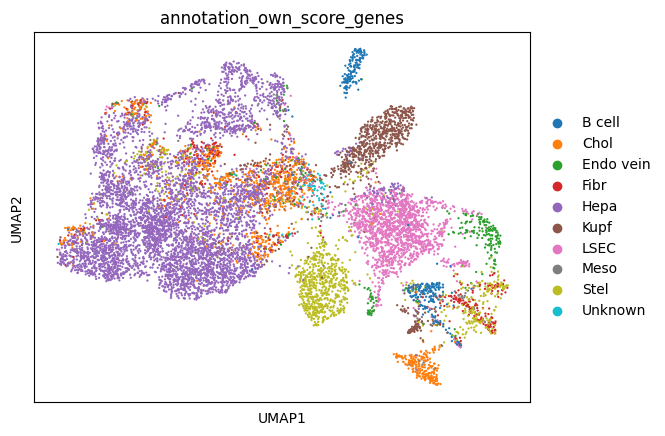

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.215176
Chol                         9.565372
Endo vein                    2.609548
Fibr                         3.206270
Hepa                        48.539366
Kupf                         8.229426
LSEC                        14.018525
Meso                         0.952975
Stel                         9.137870
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.320880,NaN,-0.007460,0.007757,-0.023154,NaN,-0.026163,NaN,NaN
1,NaN,-0.010901,NaN,NaN,0.333277,NaN,0.210321,NaN,0.387969
2,NaN,NaN,NaN,NaN,-0.023148,NaN,0.331554,NaN,0.683085
3,-0.176884,NaN,NaN,-0.035000,NaN,NaN,0.144196,NaN,0.232001
4,-0.126013,NaN,NaN,-0.007923,NaN,-0.052026,-0.024687,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.012917,NaN,NaN,-0.016126,NaN,-0.046741,-0.026287,NaN,NaN
11224,0.277005,NaN,NaN,0.001780,0.006621,-0.034922,-0.019544,NaN,NaN
11225,0.046972,NaN,NaN,-0.016714,0.007037,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.017773,0.540298,0.149693,NaN,NaN


In [11]:
# With norm_expr_var = True and norm_cell_type_score = ZeroMax
scores = own_score_genes(sdata,path_mg,scale_score='ZeroMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


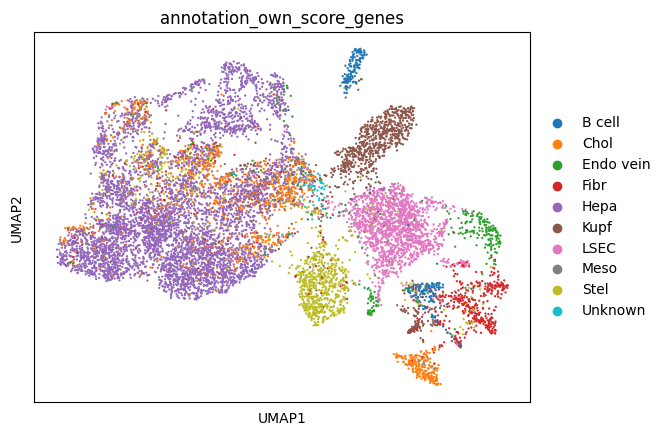

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.769861
Chol                        11.115069
Endo vein                    2.894549
Fibr                         5.103313
Hepa                        46.107944
Kupf                         8.460990
LSEC                        13.991806
Meso                         0.979694
Stel                         8.051300
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.861590,NaN,-0.508547,0.405212,-2.110327,NaN,-3.227286,NaN,NaN
1,NaN,-0.574773,NaN,NaN,30.376418,NaN,25.943272,NaN,23.226124
2,NaN,NaN,NaN,NaN,-2.109787,NaN,40.897466,NaN,40.893458
3,-3.231182,NaN,NaN,-1.828302,NaN,NaN,17.786659,NaN,13.888957
4,-2.301904,NaN,NaN,-0.413894,NaN,-2.840678,-3.045217,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.235949,NaN,NaN,-0.842371,NaN,-2.552136,-3.242467,NaN,NaN
11224,5.060102,NaN,NaN,0.092965,0.603503,-1.906806,-2.410772,NaN,NaN
11225,0.858052,NaN,NaN,-0.873106,0.641340,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,1.619867,29.500845,18.464775,NaN,NaN


In [12]:
# With norm_expr_var = True and scale_score = None
scores = own_score_genes(sdata,path_mg,scale_score='None')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


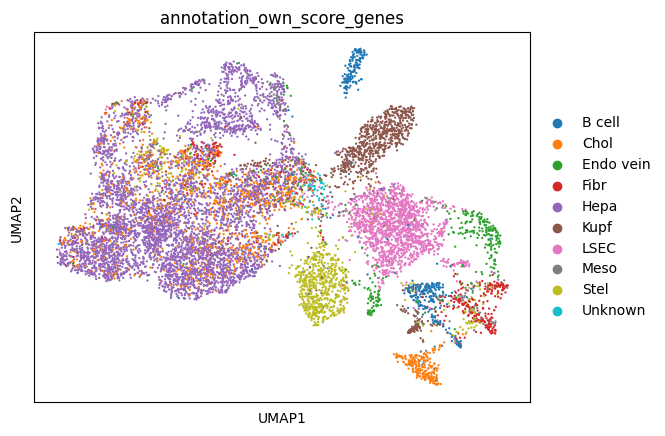

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       3.669398
Chol                        11.907731
Endo vein                    3.375490
Fibr                         3.678304
Hepa                        44.299964
Kupf                         8.452084
LSEC                        13.902743
Meso                         2.101888
Stel                         8.086926
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.586159,NaN,-0.056505,0.057887,-0.131895,NaN,-0.153680,NaN,NaN
1,NaN,-0.052252,NaN,NaN,1.898526,NaN,1.235394,NaN,4.645225
2,NaN,NaN,NaN,NaN,-0.131862,NaN,1.947498,NaN,8.178692
3,-0.323118,NaN,NaN,-0.261186,NaN,NaN,0.846984,NaN,2.777791
4,-0.230190,NaN,NaN,-0.059128,NaN,-0.177542,-0.145010,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,-0.023595,NaN,NaN,-0.120339,NaN,-0.159509,-0.154403,NaN,NaN
11224,0.506010,NaN,NaN,0.013281,0.037719,-0.119175,-0.114799,NaN,NaN
11225,0.085805,NaN,NaN,-0.124729,0.040084,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.101242,1.843803,0.879275,NaN,NaN


In [13]:
# With norm_expr_var = True and scale_score = Nmarkers
scores = own_score_genes(sdata,path_mg,scale_score='Nmarkers')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

0.25


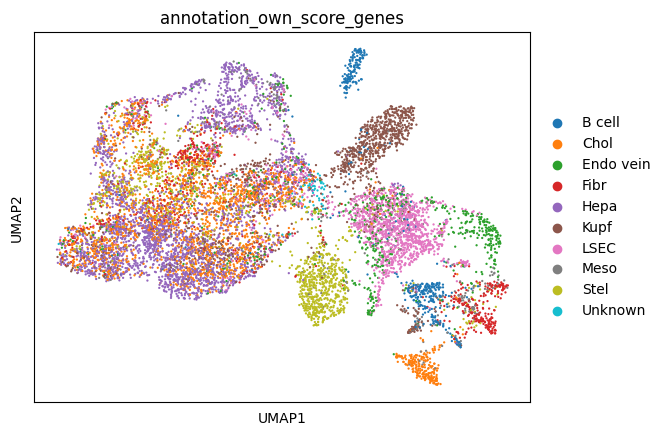

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       4.381902
Chol                        18.534022
Endo vein                    6.154257
Fibr                         6.172070
Hepa                        24.964375
Kupf                        11.943356
LSEC                        13.671179
Meso                         2.680798
Stel                        10.972569
Unknown                      0.525472


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.876202,NaN,0.728937,0.658799,0.635198,NaN,0.355629,NaN,NaN
1,NaN,0.749510,NaN,NaN,0.969808,NaN,0.974172,NaN,0.997684
2,NaN,NaN,NaN,NaN,0.635376,NaN,0.991183,NaN,0.999198
3,0.286961,NaN,NaN,0.298094,NaN,NaN,0.949056,NaN,0.992162
4,0.339508,NaN,NaN,0.531261,NaN,0.376113,0.399092,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11223,0.478180,NaN,NaN,0.462237,NaN,0.422782,0.351621,NaN,NaN
11224,0.837104,NaN,NaN,0.610082,0.847079,0.523780,0.538030,NaN,NaN
11225,0.557268,NaN,NaN,0.457161,0.848058,NaN,NaN,NaN,NaN
11226,NaN,NaN,NaN,NaN,0.869701,0.981653,0.953064,NaN,NaN


In [14]:
# With norm_expr_var = True and scale_score = Rank
scores = own_score_genes(sdata,path_mg,scale_score='Rank')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores